# Automotive Persona

This persona is much into autombiles especially cars, it has huge interest towards automobile parts, sales, repairs, engines and different brands associated with them. They know everything about automobiles, their reviews and mostly use terms related to automobiles, most of the population in this category range between ages 18-30 yrs and drive a lot, they spend most of their time on road driving different vehicles and in the remaining time they research about new cars and modify the existing ones. They like luxury cars but are more into sporty or performance vehicles.They spend a significant amount of money on cars and their parts.

### Overview

In this project we compare any given sentence with a persona and display the words with their respective scores which are of least and highest interest to these people, with the help of which the sentences can be framed to attract these people. This helps in creating sentences for marketing.


### Using the platform

We made this platform with precision and keeping our user in mind, easy to use and you could get everything you need within a matter of seconds.

Follow these two simple steps

1.Enter the text you would like to ask this persona and press enter
2.Enter the number of positive or negative words you want to see and press enter


In [1]:
#importing necessary packages
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#IPython.display import

Enter any string to calculate the lift score with persona: Elon Musk might say some crazy stuff, but he's right about at least one thing: his electric vehicles have changed the world. When the Model S launched in 2012, it was the first long-range, widely desired electric vehicle, and mainstream automakers have been struggling to catch up ever since. The Model S is still impressive—it now has an EPA-estimated 373 miles of range in its Long Range variant—but for all its focus on autonomous technology, over-the-air updates, and Easter eggs, Tesla's interiors and build quality can sometimes fall short of expectations. Better-established luxury automakers are finally getting in on the EV game—Porsche's Taycan is aimed directly at the Model S, for example—and Tesla will need all its Silicon Valley pivot-power to stay ahead of the pack.  The seven-seat Volvo XC90 is another luxury midsize SUV that boasts pioneering technology. It comes standard with high-tech safety systems that help you stay

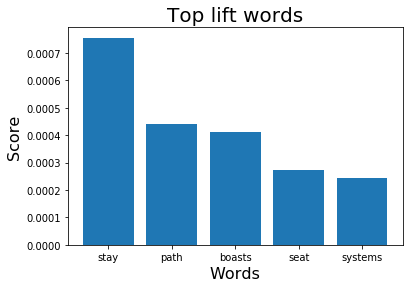

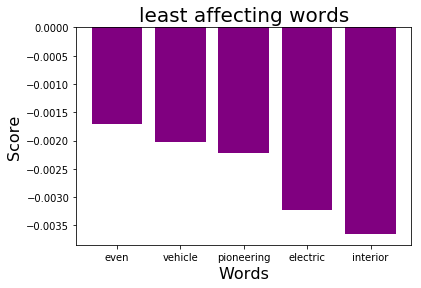

In [5]:

#personality of the persona is defined here
data_corpus="5-speed 6-speed acclaimed advanced affordable agile all-wheel drive astonishing automatic automotive beyond compare engines interior classic crash-tested custom-built custom-designed customized distinctive drivetrain functional futuristic engine high-agility hybrid innovative legendary limitless low-emission luxurious luxury manual more new noteworthy performance-inspired pinpoint powerful progressive dynamic easy-to-drive economical effective electric elegant engineered enhanced environmentally-friendly ergonomic expensive extreme family-friendly fast faster four-wheel drive front-wheel drive fuel-efficient ready-for-action reinforced safe scientific sleek sluggish speedy sporty standard stylish top-dollar top-level tuned ultimate ultra unparalled used versatile  acceleration accessories adventure agility air injection alloys automobile boxer engine brake pad car carbon fiber comfort construction control convertible coupe crash rating cruise control interior luxury make mile mileage model motor motorcycle options passenger perfection performance power precision pricing profile quality refinement drafting driver driving elegance emission engine engineering excellence experience exterior feature feeling form function handling horsepower incentive innovation road road contact safety sedan sophistication specs speed sportiness sportster standard style styling system technology throttle transmission trims vehiclebuild control cruise drive engineer rev rev the engine ride shift speed fly go handle maximize perform test drive transport turn zoom Audi BMW Buick Cadillac Chevrolet Chrysler Dodge Ferrari Ford GM GEM GMC Honda Hummer Hyundai Infiniti Isuzu Jaguar Jeep Kia Lamborghini Land Rover Lexus Lincoln Lotus Mazda Mercedes-Benz Mercury Mitsubishi Nissan Oldsmobile Peugeot Pontiac Porsche Regal Saab Saturn Subaru Suzuki Toyota Volkswagen Volvo"



def token(text):
    """
    converting the text to lower case and tokenizing it 
    """
    text=text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    token =tokenizer.tokenize(text)
    return token

def core_cosine_similarity(vector1, vector2):
    """
    measure cosine similarity between two vectors
    :vector1:
    :vector2:
    :return: 0 < cosine similarity value < 1
    """
    return 1  - spatial.distance.cosine(vector1, vector2)

def _sentence_similarity(sent1, sent2, stopwords=None):
    """
    compares two sentences and computes their cosine similarity
    """
    if stopwords is None:
        stopwords = []
    
        sent1 = [w.lower() for w in sent1]
        sent2 = [w.lower() for w in sent2]

        all_words = list(set(sent1 + sent2))

        vector1 = [0] * len(all_words)
        vector2 = [0] * len(all_words)

        # build the vector for the first sentence
        for w in sent1:
            if w in stopwords:
                continue
            vector1[all_words.index(w)] += 1

        # build the vector for the second sentence
        for w in sent2:
            if w in stopwords:
                continue
            vector2[all_words.index(w)] += 1

        return core_cosine_similarity(vector1, vector2)
    
    
def sentences_rel(data,num):
    """
    each word in a sentence is removed and been compared to the
    corpus to calculate similarity score and top and least similar 
    sentences are displayed
    """
    a = []
    s = []
    d = []
    e = []
    
    cor = token(data)
    corp = [c for c in cor if c.isalpha()]
    stop_words = set(stopwords.words('english')) 
    words = [w for w in cor if w not in stop_words]
    bs = np.array(_sentence_similarity(data_corpus,data))
    print("\nBaseline score is:",bs)
    s.append(data) 
    a.append(bs)
    

    for i in words:
        
        j = data.replace(i,"")
        c = np.array(_sentence_similarity(data_corpus,j))
        e.append(c-bs)
        s.append(words) 
        a.append(c)
        d.append(i)
    d = pd.DataFrame(d)
    e = pd.DataFrame(e)
    df_1 = pd.DataFrame(s)
    a = pd.DataFrame(a)
    df_1 = pd.concat([df_1,a,d,e], axis =1)
    df_1.columns = ['sentence', 'score','word','lift']
    df_2=df_1.drop_duplicates(subset=['word'])
    df_2= df_2[:-1]
    top_sentences = df_2.sort_values(by='lift', ascending=False)
   
    
    top_sentences1=top_sentences.head(num)
    least_sentences=top_sentences.tail(num)
    
    print("\nTop",num,"contributing lift words are:\n",top_sentences1[['word', 'lift']])
    print("\nLeast",num,"contributing lift words are:\n",least_sentences[['word', 'lift']])
    
    #plotting the top scores and words
    fig = plt.Figure()
    plt.bar(top_sentences1.word, top_sentences1.lift)
    plt.title('Top lift words', fontsize=20)
    plt.xlabel('Words', fontsize=16)
    plt.ylabel('Score', fontsize=16)
    plt.show()
    
    #plotting the least scores and words
    
    plt.bar(least_sentences.word, least_sentences.lift,color='purple')
    plt.title('least affecting words', fontsize=20)
    plt.xlabel('Words', fontsize=16)
    plt.ylabel('Score', fontsize=16)
    plt.show()
    
    #return "top 5 sentence with highest similarity are:",top_sentences[:5],"least 5:",top_sentences.tail(5)

def vector(text):
    """
    input text is vectorized with respect to corpus and 
    average score is generated
    """
    vectorizer=CountVectorizer()
    
    a=token(data_corpus)
    text=[text]
    vocabulary=vectorizer.fit(a)
    X= vectorizer.transform(text)
    a=X.toarray()
    b=a.tolist()
    c=np.mean(a)
    b=vocabulary.get_feature_names()
    return "The baseline score is:",c    


if __name__ =='__main__':
    """
    input is taken from the user and all functions are run here
    """
    
    data = input("Enter any string to calculate the lift score with persona: ");
    num=int(input("Enter how many top and lest lift words you want: "))
    
    c=sentences_rel(data,num)
    


## Sample input

Elon Musk might say some crazy stuff, but he's right about at least one thing: his electric vehicles have changed the world. When the Model S launched in 2012, it was the first long-range, widely desired electric vehicle, and mainstream automakers have been struggling to catch up ever since. The Model S is still impressive—it now has an EPA-estimated 373 miles of range in its Long Range variant—but for all its focus on autonomous technology, over-the-air updates, and Easter eggs, Tesla's interiors and build quality can sometimes fall short of expectations. Better-established luxury automakers are finally getting in on the EV game—Porsche's Taycan is aimed directly at the Model S, for example—and Tesla will need all its Silicon Valley pivot-power to stay ahead of the pack.

The seven-seat Volvo XC90 is another luxury midsize SUV that boasts pioneering technology. It comes standard with high-tech safety systems that help you stay alert, detect people and large animals in your path, and even handles some of the driving with its semiautonomous Pilot Assist. Shoppers who favor heart-pumping over a lavish interior should take a Porsche Cayenne out for a spin. This five-seat SUV's potent powertrains launch it from zero to 60 mph in as little as 3.9 seconds, while its smartly tuned suspension treats passengers to a comfortable ride.

## Future scope

### 1 Month
We would improve the charts, inculcate the whole program on a web server and diplay on a website so only the input box is visible.

### 3 Months
Find better algorithms to increase precision and also increase knowledge of the model, will also try to add more features and personas to the platform which would help users benefit.

## Refernces:
Coderasha. (2020, January 3). Compare documents similarity using Python: NLP. Retrieved from https://dev.to/coderasha/compare-documents-similarity-using-python-nlp-4odp

Brownlee, J. (2019, December 18). A Gentle Introduction to Calculating the BLEU Score for Text in Python. Retrieved from https://machinelearningmastery.com/calculate-bleu-score-for-text-python/

(n.d.). Retrieved from http://fjavieralba.com/basic-sentiment-analysis-with-python.html

ratan123. (2020, March 27). Sentiment Extraction:Understanding metric EDA. Retrieved from https://www.kaggle.com/ratan123/sentiment-extraction-understanding-metric-eda#Calculating-Jaccard-similarity-using-NLTK-Library:

Scott, W. (2019, May 21). TF-IDF for Document Ranking from scratch in python on real world dataset. Retrieved from https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

Predum, R. (2019, April 30). Customer Segmentation Analysis with Python. Retrieved from https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e

Gupta, S. (2020, January 10). Overview of Text Similarity Metrics in Python. Retrieved from https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50


## Appendices